In [1]:
from CINN import CINN
import torch
from scipy.constants import pi
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

In [2]:
def plot_driftwave(frame, model, resolution_t):
    pos = torch.linspace(0,2*pi,100)
    t_grid = torch.linspace(0,1e-3,resolution_t)

    pred = model(torch.stack((pos,torch.full((100,),t_grid[frame])),-1))

    ln.set_data(pos,pred.detach().numpy())
    return ln,

In [3]:
def plot_from_file(frame, model):
    pos = torch.linspace(0,2*pi,100)
    file_name = "../../NewDataset/Ln0.01Ky1/fileTimestep" + str(frame) + "Ln0.01Ky1.0.csv"
    df = pd.read_csv(file_name)
    Ts = df.iloc[0].loc['Ts']
    sol = torch.tensor(df['sol']/1e17)

    pred = model(torch.stack((pos,torch.full((100,),Ts)),-1))

    ln.set_data(pos, sol.detach().numpy())
    ln2.set_data(pos, pred.detach().numpy())
    return ln,ln2

In [4]:
T = 100
Ln = 0.01
v = -2*pi*T/Ln

In [5]:
network = CINN(v)

In [6]:
weights = torch.load("weights.pt", map_location=torch.device('cpu'))

In [7]:
network.load_state_dict(weights)

<All keys matched successfully>

In [8]:
resolution_t = 100

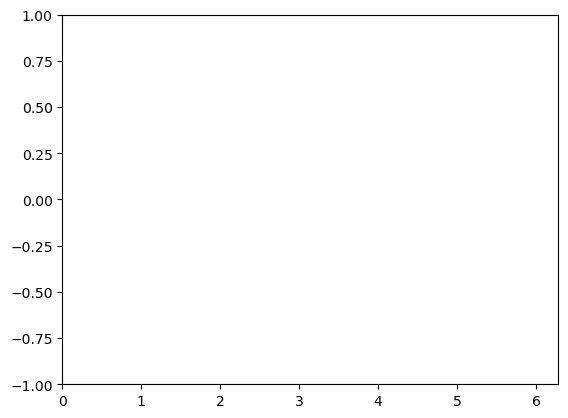

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2*pi), ylim=(-1,1))
ln, = ax.plot([],[])
ln2, = ax.plot([],[])

In [10]:
ani = FuncAnimation(fig, plot_from_file, frames=1000, interval=100, fargs=(network,), blit=True)

In [11]:
ani.save("anim.mp4")